# CIFAR Dataset

In [54]:
import numpy as np
import pandas as plt
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import cifar10
from keras.utils import np_utils
from keras import backend as K
from keras.callbacks import Callback
import warnings
warnings.filterwarnings('ignore')
K.set_image_data_format('channels_last')

In [55]:
# Loading data
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [56]:
# Converting data to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [57]:
# Shape of the data
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [58]:
# Normalizing the data
mean = np.mean(X_train,axis=(0,1,2,3))
std = np.std(X_train,axis=(0,1,2,3))
X_train = (X_train-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)

In [59]:
# One hot encoding labels
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_train = ohe.fit_transform(y_train)
y_test = ohe.fit_transform(y_test)

In [60]:
# Shape of the data
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


In [61]:
# Building the model
from keras.models import Sequential
from keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten,Dropout

In [62]:
input_shape = (32,32,3)
def create_model():
    model = Sequential()

    model.add(Convolution2D(32,(3,3),padding='same',activation='relu',input_shape=input_shape))
    model.add(Convolution2D(32,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(Convolution2D(64,(3,3),padding='same',activation='relu'))
    model.add(Convolution2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(Convolution2D(64,(3,3),padding='same',activation='relu'))
    model.add(Convolution2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(10,activation='softmax'))
    return model

In [63]:
K.clear_session()
model = create_model()

In [64]:
# Compiling model
from keras.optimizers import Adam
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [65]:
# Custom callback for logging
class CustomCallBack(Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(epoch%5==0):
            print("Finished epoch ",epoch)
            print("-----------------------")
            print("Loss on training data:",logs.get('loss'))
            print("Accuracy on training data:",logs.get('accuracy'))
            print("Loss on testing data:",logs.get('val_loss'))
            print("Accuracy on testing data:",logs.get('val_accuracy'))
            print('\n')
            return

In [66]:
# Training the model
history = model.fit(X_train,y_train,epochs=50,batch_size=256,validation_data=(X_test,y_test),
          workers=8,use_multiprocessing=True,verbose=0,callbacks=[CustomCallBack()])

Finished epoch  0
-----------------------
Loss on training data: 1.8520715884017944
Accuracy on training data: 0.30096
Loss on testing data: 1.501058644104004
Accuracy on testing data: 0.4320000112056732


Finished epoch  5
-----------------------
Loss on training data: 0.9885739407348633
Accuracy on training data: 0.64974
Loss on testing data: 0.9055987649917603
Accuracy on testing data: 0.6840000152587891


Finished epoch  10
-----------------------
Loss on training data: 0.7929713722229004
Accuracy on training data: 0.7225
Loss on testing data: 0.7514262662887573
Accuracy on testing data: 0.7401999831199646


Finished epoch  15
-----------------------
Loss on training data: 0.7029623132705688
Accuracy on training data: 0.75394
Loss on testing data: 0.6604190494537353
Accuracy on testing data: 0.7732999920845032


Finished epoch  20
-----------------------
Loss on training data: 0.6476470467758179
Accuracy on training data: 0.77344
Loss on testing data: 0.6504620532989502
Accuracy on

Text(0.5, 1.0, 'Accuracy Curve')

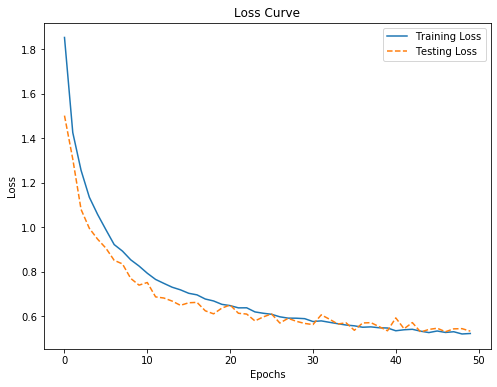

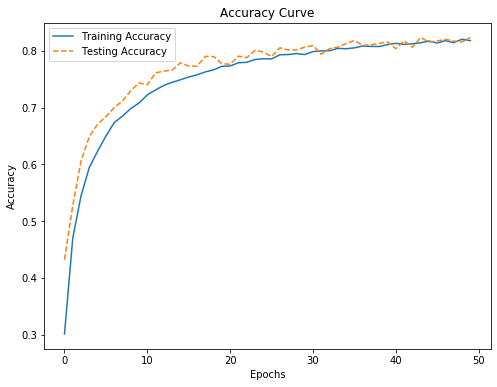

In [67]:
# Loss Curves
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],ls='--')
plt.legend(['Training Loss','Testing Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Curve")

# Accuracy Curves
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],ls='--')
plt.legend(['Training Accuracy','Testing Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy Curve")